In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import collections
warnings.filterwarnings('ignore')
from konlpy.tag import Mecab
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from PIL import Image
nltk.download('punkt')

C:\Users\jeonj\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jeonj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
data = pd.read_csv('D:\polo_main.csv')

data.drop_duplicates(subset=['comment'], inplace=True)

# 중복 제거
data.drop_duplicates(subset = ['comment'], inplace=True) 
# 정규 표현식 수행
data['comment'] = data['comment'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","") 
# 공백은 Null 값으로 변경
data['comment'].replace('', np.nan, inplace=True) 
# Null 값 제거
data = data.dropna(how='any') 

stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [3]:
from eunjeon import Mecab
mecab = Mecab()

In [4]:
li=[]
for i in data['comment'].to_list():
    li.append(mecab.nouns(i))

In [5]:
lis=sum(li, [])

In [6]:
# 워드클라우드 함수
def plotting_WordCloud(x):
  # plotting WordCloud
  icon = Image.open('D:\drive/phploeBuh.png').resize((600,600)) # 워드클라우드 모양 변형을 위한 마스크 설정
  mask = np.array(icon)
  wc = WordCloud(font_path = 'D:\drive/NanumGothic.ttf',
                 background_color='white', # 배경색
                 width = 100, # 넓이
                 height = 100, # 길이
                 max_words = 100, # 최대 수용 단어 개수
                 max_font_size = 125,
                 mask = mask).generate_from_frequencies(dict(x))
  plt.figure(figsize= (15,10))
  plt.axis('off')
  plt.imshow(wc,interpolation='bilinear')
  return

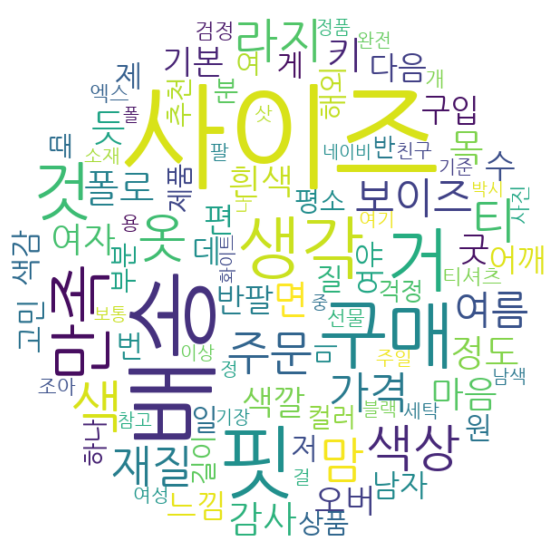

In [7]:
plotting_WordCloud(collections.Counter(lis))